In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
file="C:\\Users\\BHUMIKA\\Downloads\\Customer_Churn.csv"
df=pd.read_csv(file)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop(["customerID"],axis=1,inplace=True)

In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 20)

In [6]:
df["TotalCharges"]=df["TotalCharges"].astype("float64",errors="ignore")

In [7]:
df["TotalCharges"].value_counts()

20.2       11
           11
19.75       9
19.9        8
19.65       8
           ..
5607.75     1
93.85       1
813.3       1
4872.35     1
315.3       1
Name: TotalCharges, Length: 6531, dtype: int64

In [8]:
df= df[df.TotalCharges!=' ']

In [9]:
df.shape

(7032, 20)

In [10]:
df_churn_no=df[df["Churn"]=='No']
df_churn_yes=df[df["Churn"]=='Yes']

C:\Users\BHUMIKA\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Number of Customers')

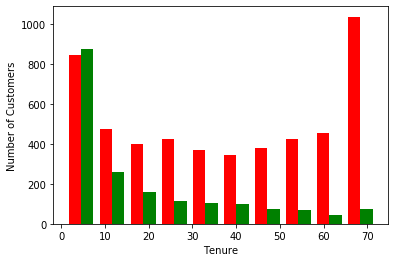

In [11]:
plt.hist([df_churn_no.tenure,df_churn_yes.tenure], color=["r","g"])
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")

Text(0, 0.5, 'Number of Customers')

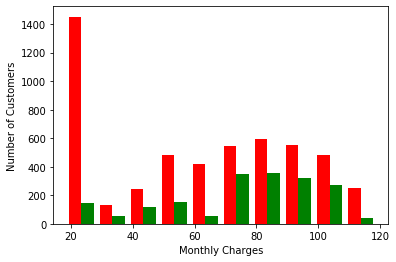

In [12]:
df_churn_no=df[df["Churn"]=='No']
df_churn_yes=df[df["Churn"]=='Yes']
plt.hist([df_churn_no.MonthlyCharges,df_churn_yes.MonthlyCharges], color=["r","g"])
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")

In [13]:
def find_cat_unique(df):
    for column_df in df.columns:
#   if df[column_df].dtypes == "object":
            print(column_df," : ",df[column_df].unique())


In [14]:
find_cat_unique(df)

gender  :  ['Female' 'Male']
SeniorCitizen  :  [0 1]
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
tenure  :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No phone service' 'No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes' 'No internet service']
OnlineBackup  :  ['Yes' 'No' 'No internet service']
DeviceProtection  :  ['No' 'Yes' 'No internet service']
TechSupport  :  ['No' 'Yes' 'No internet service']
StreamingTV  :  ['No' 'Yes' 'No internet service']
StreamingMovies  :  ['No' 'Yes' 'No internet service']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges  :  [

In [15]:
df.replace('No internet service',"No",inplace=True)
df.replace('No phone service',"No",inplace=True)

In [16]:
find_cat_unique(df)

gender  :  ['Female' 'Male']
SeniorCitizen  :  [0 1]
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
tenure  :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes']
OnlineBackup  :  ['Yes' 'No']
DeviceProtection  :  ['No' 'Yes']
TechSupport  :  ['No' 'Yes']
StreamingTV  :  ['No' 'Yes']
StreamingMovies  :  ['No' 'Yes']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges  :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges  :  ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn  :  ['No' 'Yes']


In [17]:
df.replace('Yes',1,inplace=True)
df.replace('No',0,inplace=True)
find_cat_unique(df)

gender  :  ['Female' 'Male']
SeniorCitizen  :  [0 1]
Partner  :  [1 0]
Dependents  :  [0 1]
tenure  :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService  :  [0 1]
MultipleLines  :  [0 1]
InternetService  :  ['DSL' 'Fiber optic' 0]
OnlineSecurity  :  [0 1]
OnlineBackup  :  [1 0]
DeviceProtection  :  [0 1]
TechSupport  :  [0 1]
StreamingTV  :  [0 1]
StreamingMovies  :  [0 1]
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges  :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges  :  ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn  :  [0 1]


In [18]:
df.gender.replace({'Female':0, 'Male':1},inplace=True)
find_cat_unique(df)

gender  :  [0 1]
SeniorCitizen  :  [0 1]
Partner  :  [1 0]
Dependents  :  [0 1]
tenure  :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService  :  [0 1]
MultipleLines  :  [0 1]
InternetService  :  ['DSL' 'Fiber optic' 0]
OnlineSecurity  :  [0 1]
OnlineBackup  :  [1 0]
DeviceProtection  :  [0 1]
TechSupport  :  [0 1]
StreamingTV  :  [0 1]
StreamingMovies  :  [0 1]
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges  :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges  :  ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn  :  [0 1]


In [19]:
df1=pd.get_dummies(data=df,columns=["InternetService","Contract","PaymentMethod"])

In [20]:
find_cat_unique(df1)

gender  :  [0 1]
SeniorCitizen  :  [0 1]
Partner  :  [1 0]
Dependents  :  [0 1]
tenure  :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService  :  [0 1]
MultipleLines  :  [0 1]
OnlineSecurity  :  [0 1]
OnlineBackup  :  [1 0]
DeviceProtection  :  [0 1]
TechSupport  :  [0 1]
StreamingTV  :  [0 1]
StreamingMovies  :  [0 1]
PaperlessBilling  :  [1 0]
MonthlyCharges  :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges  :  ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn  :  [0 1]
InternetService_0  :  [0 1]
InternetService_DSL  :  [1 0]
InternetService_Fiber optic  :  [0 1]
Contract_Month-to-month  :  [1 0]
Contract_One year  :  [0 1]
Contract_Two year  :  [0 1]
PaymentMethod_Bank transfer (automatic)  :  [0 1]
PaymentMethod_Credit card (automatic)  :  [0 1]
PaymentMethod_Electronic check  : 

In [21]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [22]:
df1["TotalCharges"]=df1["TotalCharges"].astype("float64",errors="ignore")

In [23]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [24]:
for my_column in ["tenure","MonthlyCharges","TotalCharges"]:
    df1[my_column]=df1[my_column]/df1[my_column].max()

In [25]:
df1[["tenure","MonthlyCharges","TotalCharges"]]

,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.251368,0.003437
1,0.472222,0.479579,0.217564
2,0.027778,0.453474,0.012453
3,0.625000,0.356211,0.211951
4,0.027778,0.595368,0.017462
...,...,...,...
7038,0.333333,0.714105,0.229194
7039,1.000000,0.869053,0.847792
7040,0.152778,0.249263,0.039892
7041,0.055556,0.626526,0.035303


In [26]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.013889,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,0.472222,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,0.027778,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,0.625000,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,0.027778,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [27]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [28]:
from sklearn.model_selection import train_test_split
x_train,  x_test, y_train, y_test = train_test_split(df1.drop("Churn",axis=1),df1["Churn"],test_size=0.2, random_state=3)

In [29]:
x_train.shape

(5625, 26)

In [30]:
import tensorflow as tf
from tensorflow import keras

model= keras.Sequential ([
        keras.layers.Dense(26,input_shape=(26,),activation='relu'),
        keras.layers.Dense(500,activation='relu'),
        keras.layers.Dense(500,activation='relu'),
        keras.layers.Dense(500,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
        ])
model.compile (optimizer="adam",
              loss='binary_crossentropy',
                metrics=["accuracy"]
              )

In [31]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 3s 12ms/step - loss: 0.4939 - accuracy: 0.7559
Epoch 2/100
176/176 [==============================] - 2s 12ms/step - loss: 0.4405 - accuracy: 0.7833
Epoch 3/100
176/176 [==============================] - 2s 12ms/step - loss: 0.4214 - accuracy: 0.8134
Epoch 4/100
176/176 [==============================] - 2s 11ms/step - loss: 0.4109 - accuracy: 0.7987
Epoch 5/100
176/176 [==============================] - 2s 11ms/step - loss: 0.4125 - accuracy: 0.8018
Epoch 6/100
176/176 [==============================] - 2s 11ms/step - loss: 0.4148 - accuracy: 0.8029
Epoch 7/100
176/176 [==============================] - 2s 10ms/step - loss: 0.3843 - accuracy: 0.8200
Epoch 8/100
176/176 [==============================] - 2s 11ms/step - loss: 0.3925 - accuracy: 0.8126
Epoch 9/100
176/176 [==============================] - 2s 11ms/step - loss: 0.3876 - accuracy: 0.8158
Epoch 10/100
176/176 [==============================] - 2s 11ms/step - loss: 0.390

In [32]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 4ms/step - loss: 1.5909 - accuracy: 0.7399


[1.5908766984939575, 0.7398720979690552]

In [33]:
yp=model.predict(x_test)
y_test_predict=[]
for x in yp:
    if x>0.5:
        y_test_predict.append(1)
    else:
        y_test_predict.append(0)

In [34]:
y_test[10:20]

4007    0
5706    1
3098    1
2464    1
3527    1
1407    0
6866    1
1876    0
3603    1
1208    1
Name: Churn, dtype: int64

In [35]:
y_test_predict[10:20]

[0, 1, 0, 1, 1, 0, 1, 0, 0, 1]

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1051
           1       0.49      0.49      0.49       356

    accuracy                           0.74      1407
   macro avg       0.66      0.66      0.66      1407
weighted avg       0.74      0.74      0.74      1407



Text(33.0, 0.5, 'Actual')

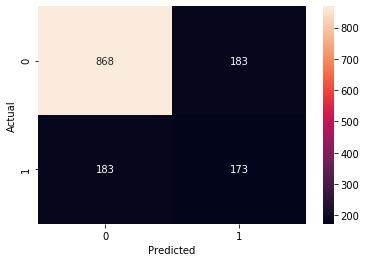

In [37]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_test_predict)
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
